In [1]:
#import libraries
from keras.models  import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [2]:
#initiate model
model = Sequential()

In [3]:
#layer 1
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#layer 3
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#layer 4
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#layer 6
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#layer 7
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#layer 8
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#layer 9
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#layer 10
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#layer 11
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#layer 12
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#layer 13
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#layer 14
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [4]:
model.add(Flatten())
#layer 15
model.add(Dense(units=4096,activation="relu"))
#layer 16
model.add(Dense(units=4096,activation="relu"))
#output layer
model.add(Dense(units=1000, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [6]:
#loading the pretrained VGG16 weights
model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels.h5")

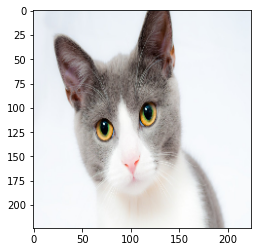

In [7]:
#loading sample image
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("images/image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224,224))

plt.imshow(image)

In [8]:
#reshaping image
image = np.expand_dims(image, axis=0)
image.shape

(1, 224, 224, 3)

In [9]:
#making a prediction
prediction = model.predict(image)

In [10]:
from keras.applications.vgg16 import decode_predictions
#convert probabilities to class labels
prediction = decode_predictions(prediction)
prediction = prediction[0][0]
# printing results
print(prediction[1], prediction[2]*100)

Egyptian_cat 86.74651384353638
